# Import Key Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Info Of the Data Set

In [2]:
df_ferries = pd.read_csv('ferry exercise_student.csv')
df_ferries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521029 entries, 0 to 521028
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  521029 non-null  int64  
 1   timestamp   520973 non-null  object 
 2   longitude   520971 non-null  float64
 3   latitude    520984 non-null  float64
 4   t1          521029 non-null  float64
 5   t2          521029 non-null  float64
 6   t3          521029 non-null  float64
 7   t4          520986 non-null  float64
 8   a1          520982 non-null  float64
 9   a3          520982 non-null  float64
 10  head        520977 non-null  float64
 11  trackspeed  521029 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 47.7+ MB


# Data Cleaning / Wrangling

The process of cleaning and unifying messy and complex datasets for easy access and analysis

### Identify missing values in tabular data:

In [3]:
df_ferries.isnull().sum()

Unnamed: 0     0
timestamp     56
longitude     58
latitude      45
t1             0
t2             0
t3             0
t4            43
a1            47
a3            47
head          52
trackspeed     0
dtype: int64

### Encode timestamp dtype

Set the utc argument to true and refrain from setting a format, to let pandas identify utc format and change dtype

In [4]:
# Example of a timestamp row value: 2020-09-10 19:30:30+02:00
df_ferries.timestamp = pd.to_datetime(df_ferries['timestamp'], utc = True)
df_ferries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521029 entries, 0 to 521028
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype              
---  ------      --------------   -----              
 0   Unnamed: 0  521029 non-null  int64              
 1   timestamp   520973 non-null  datetime64[ns, UTC]
 2   longitude   520971 non-null  float64            
 3   latitude    520984 non-null  float64            
 4   t1          521029 non-null  float64            
 5   t2          521029 non-null  float64            
 6   t3          521029 non-null  float64            
 7   t4          520986 non-null  float64            
 8   a1          520982 non-null  float64            
 9   a3          520982 non-null  float64            
 10  head        520977 non-null  float64            
 11  trackspeed  521029 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(10), int64(1)
memory usage: 47.7 MB


In [5]:
df_ferries.tail()

,Unnamed: 0,timestamp,longitude,latitude,t1,t2,t3,t4,a1,a3,head,trackspeed
521024,521024,2021-03-10 15:28:00+00:00,10.885600,54.917833,477.6,290.4,458.7,416.0,186.0,177.0,137.99,15.34
521025,521025,2021-03-10 15:28:30+00:00,10.887900,54.916883,471.6,287.2,462.0,423.0,184.0,177.0,137.90,15.21
521026,521026,2021-03-10 15:29:00+00:00,10.890200,54.915950,471.6,292.0,490.6,451.0,181.0,177.0,137.72,15.21
521027,521027,2021-03-10 15:29:30+00:00,10.892517,54.915000,492.0,298.4,493.9,448.0,188.0,177.0,138.08,15.34
521028,521028,2021-03-10 15:30:00+00:00,10.894817,54.914050,469.2,292.8,486.2,449.0,187.0,177.0,138.25,15.34


### Impute missing values:
Since only the timestamp column is of type 'datetime', I use the median strategy for imputing data here. Which imputes NaN values to the most frequent value in that column

In [6]:
# The SimpleImputer class does not support datetime dtypes, so I use the pandas built-in 'fillna' function instead
df_ferries.timestamp = df_ferries.timestamp.fillna(df_ferries.timestamp.median())

In [7]:
df_ferries.isnull().sum()

Unnamed: 0     0
timestamp      0
longitude     58
latitude      45
t1             0
t2             0
t3             0
t4            43
a1            47
a3            47
head          52
trackspeed     0
dtype: int64

#### Impute the float columns:

Impute the NaN values to the average value of the given column

In [8]:
df_ferries.fillna({
    'longitude':df_ferries['longitude'].mean(),
    'latitude':df_ferries['latitude'].mean(),
    't4':df_ferries['t4'].mean(),
    'a1':df_ferries['a1'].mean(),
    'a3':df_ferries['a3'].mean(),
    'head':df_ferries['head'].mean()},
    inplace=True)
df_ferries.isnull().sum()

Unnamed: 0    0
timestamp     0
longitude     0
latitude      0
t1            0
t2            0
t3            0
t4            0
a1            0
a3            0
head          0
trackspeed    0
dtype: int64

## Make an extra column that shows when the ferry has been still (in harbour) based upon trackspeed. Afterwards, remove the column 'trackspeed'.
### The new column should be the target variable

In [9]:
# Create a new boolean column based on the trackspeed:
df_ferries['harboured'] = np.where(df_ferries['trackspeed'] == 0.0, True, False)

In [10]:
# Check to see how many rows have the ferry harboured
harboured_sum = len(df_ferries[df_ferries['harboured']==True])
harboured_percentage =  harboured_sum / len(df_ferries.harboured.values) * 100
print(harboured_percentage, '% of the rows have harboured set to True')

43.73959990710689 % of the rows have harboured set to True


In [11]:
import seaborn as sns

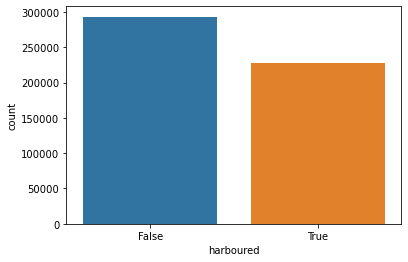

In [16]:
sns.countplot(x=df_ferries['harboured'])
plt.show()

In [17]:
# Remove the trackspeed column now
df_ferries.drop(columns={'trackspeed'}, inplace=True)

In [18]:
# See the dataframe after change
df_ferries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521029 entries, 0 to 521028
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype              
---  ------      --------------   -----              
 0   Unnamed: 0  521029 non-null  int64              
 1   timestamp   521029 non-null  datetime64[ns, UTC]
 2   longitude   521029 non-null  float64            
 3   latitude    521029 non-null  float64            
 4   t1          521029 non-null  float64            
 5   t2          521029 non-null  float64            
 6   t3          521029 non-null  float64            
 7   t4          521029 non-null  float64            
 8   a1          521029 non-null  float64            
 9   a3          521029 non-null  float64            
 10  head        521029 non-null  float64            
 11  harboured   521029 non-null  bool               
dtypes: bool(1), datetime64[ns, UTC](1), float64(9), int64(1)
memory usage: 44.2 MB


## Standardize the dataset